# Exercício de análise de Co2 (Métodos Matriciais)

Nestes exercícios será utilizada uma série de tempo de concentração mensal de CO2 na atmosfera (o cabeçalho do arquivo explica a estrutura dos dados), medida no Laboratório de Mauna Loa (Havaí). Note que os dados ausentes na série de CO2 são representados por -99,99. Como nos exercícios anteriores, esses dados devem ser removidos de todas as análises feitas nos exercícios abaixo. Os dados podem ser encontrados no endereço: ftp://ftp.cmdl.noaa.gov/ccg/co2/trends/co2_mm_mlo.txt. 

Carregando o arquivo co2_mm_mlo.txt. As linhas que começam com # foram removidas.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import linalg

f = open('co2_mm_mlo.txt', 'r')

# finds the header lines and stores the result in 'pos'
def find_char_lista(lista, char):
    pos = []
    count = 1
    for line in lista:
        if (line.find(char) == 0):
            pos += [count]
            count += 1

    return pos

print(pos)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [31]:
# loads all lines
lines = f.readlines()

# removes the header
pos = find_char_lista(lines, '#')
lines = lines[pos[-1]+1:]

# creates an data matriz filled with zeros
line = lines[1]
num_lines = len(lines)
num_words = len(line.split())
matrix = np.zeros((num_lines,num_words))
print(matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
row_n = 0
for line in lines:
    if (line.find('#') == -1):   # if '#' is not found, it returns -1
        line = line.rstrip("\n") # removes the line break character
        line = line.split()
        line = [float(i) for i in line]
        matrix[row_n,:] = line
        row_n += 1


print(matrix.shape)
print(matrix)    
f.close()

(761, 8)
[[ 1.9580000e+03  4.0000000e+00  1.9582877e+03 ... -1.0000000e+00
  -9.9900000e+00 -9.9000000e-01]
 [ 1.9580000e+03  5.0000000e+00  1.9583699e+03 ... -1.0000000e+00
  -9.9900000e+00 -9.9000000e-01]
 [ 1.9580000e+03  6.0000000e+00  1.9584548e+03 ... -1.0000000e+00
  -9.9900000e+00 -9.9000000e-01]
 ...
 [ 2.0210000e+03  6.0000000e+00  2.0214583e+03 ...  2.8000000e+01
   6.5000000e-01  2.3000000e-01]
 [ 2.0210000e+03  7.0000000e+00  2.0215417e+03 ...  3.0000000e+01
   7.0000000e-01  2.5000000e-01]
 [ 2.0210000e+03  8.0000000e+00  2.0216250e+03 ...  2.6000000e+01
   7.3000000e-01  2.7000000e-01]]


In [33]:
# creates the time and co2 vectors
time = matrix[:,2]
co2 = matrix[:,3]

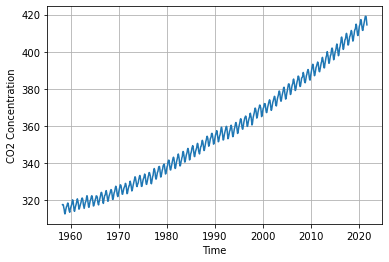

In [34]:
# ploting the time series
plt.plot(time,co2)
plt.ylabel('CO2 Concentration')
plt.xlabel('Time')
plt.grid(True)
plt.show()

In [35]:
# creating matrix A
A = np.array([np.ones(len(time)),time])
A = np.transpose(A)
# solving the least-squares problem
x, resid, rank, sigma = linalg.lstsq(A,co2)
mod = np.dot(A,x)

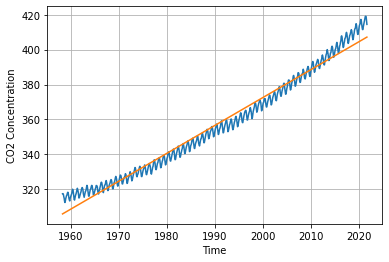

In [36]:
# ploting the result
plt.plot(time,co2)
plt.plot(time,mod)
plt.ylabel('CO2 Concentration')
plt.xlabel('Time')
plt.grid(True)
plt.show()

In [37]:
# creating matrix A
A2 = np.array([np.ones(len(time)),time,time**2])
A2 = np.transpose(A2)
# solving the least-squares problem
x2, resid, rank, sigma = linalg.lstsq(A2,co2)
mod2 = np.dot(A2,x2)

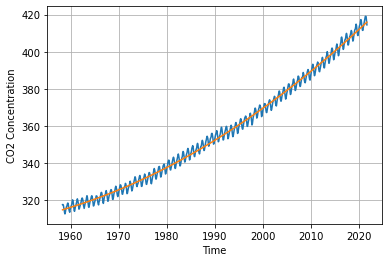

In [38]:
# ploting the result
plt.plot(time,co2)
plt.plot(time,mod2)
plt.ylabel('CO2 Concentration')
plt.xlabel('Time')
plt.grid(True)
plt.show()

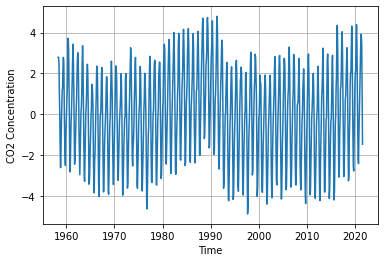

In [39]:
res = co2 - mod2
# ploting the result
plt.plot(time,res)
plt.ylabel('CO2 Concentration')
plt.xlabel('Time')
plt.grid(True)
plt.show()

In [40]:
T = 1
w = 2*np.pi/T
# creating matrix A
A3 = np.array([np.ones(len(time)),np.sin(w*time),np.cos(w*time),np.sin(2*w*time),np.sin(2*w*time)])
A3 = np.transpose(A3)
# solving the least-squares problem
x3, resid, rank, sigma = linalg.lstsq(A3,res)
mod3 = np.dot(A3,x3)

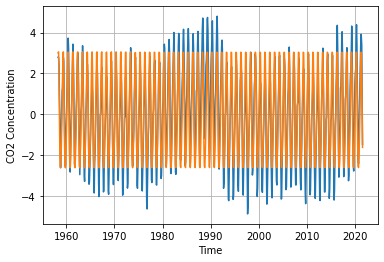

In [41]:
# ploting the result
plt.plot(time,res)
plt.plot(time,mod3)
plt.ylabel('CO2 Concentration')
plt.xlabel('Time')
plt.grid(True)
plt.show()

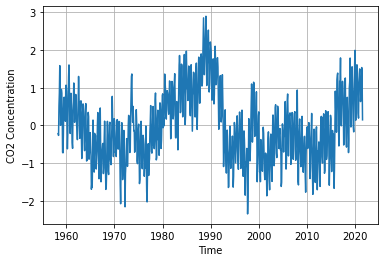

In [42]:
res2 = res - mod3
# ploting the result
plt.plot(time,res2)
plt.ylabel('CO2 Concentration')
plt.xlabel('Time')
plt.grid(True)
plt.show()